#                                                             Heart🫀STROKE DETECTION SYSTEM🧠

# import Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Read Dataset

In [3]:
df= pd.read_csv(r"healthcare-dataset-stroke-data.csv")
print("top 5 rows of data:")
df.head(5)

top 5 rows of data:


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Drop Column

In [4]:
df.drop('id', axis=1, inplace=True)

# Summarization of Data

In [5]:
print("Statically Summary About Data:")
df.describe()

Statically Summary About Data:


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
print("Information Regarding Data")
df.info()


Information Regarding Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
print(df['age'].astype(int))   #change Datatype

0       67
1       61
2       80
3       49
4       79
        ..
5105    80
5106    81
5107    35
5108    51
5109    44
Name: age, Length: 5110, dtype: int32


# Missing Values

In [8]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [9]:
df['bmi'].fillna(df['bmi'].mode()[0],inplace=True)       #handle missing values
print(df.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


# distinct values

In [10]:
print(df['ever_married'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())
print(df['gender'].value_counts())


ever_married
Yes    3353
No     1757
Name: count, dtype: int64
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64


# Change Distinct Values For ML Model

In [11]:
df['ever_married'].replace({'Yes':1, 'No':0}, inplace=True)
df['gender'].replace({'Male':1, 'Female':0,'Other':2}, inplace=True)
df['Residence_type'].replace({'Urban':1, 'Rural':0}, inplace=True)
df['smoking_status'].replace({'formerly smoked':0, 'never smoked':1, 'smokes':2, 'Unknown':3}, inplace=True)
df['work_type'].replace({'Private':0, 'Self-employed':1, 'children':2, 'Govt_job':3, 'Never_worked':4}, inplace=True)


In [12]:
# replace age with number wrt to age group
# 0 = 0-12 , 1 = 13-19 , 2 = 20-30 , 3 = 31-60 , 4 = 61-100 
df['age']=pd.cut(x=df['age'],bins=[0,12,19,30,60,90],labels=[0,1,2,3,4])
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,4,0,1,1,0,1,228.69,36.6,0,1
1,0,4,0,0,1,1,0,202.21,28.7,1,1
2,1,4,0,1,1,0,0,105.92,32.5,1,1
3,0,3,0,0,1,0,1,171.23,34.4,2,1
4,0,4,1,0,1,1,0,174.12,24.0,1,1
5,1,4,0,0,1,0,1,186.21,29.0,0,1
6,1,4,1,1,1,0,0,70.09,27.4,1,1
7,0,4,0,0,0,0,1,94.39,22.8,1,1
8,0,3,0,0,1,0,0,76.15,28.7,3,1
9,0,4,0,0,1,0,1,58.57,24.2,3,1


# Exploratory Data Analysis

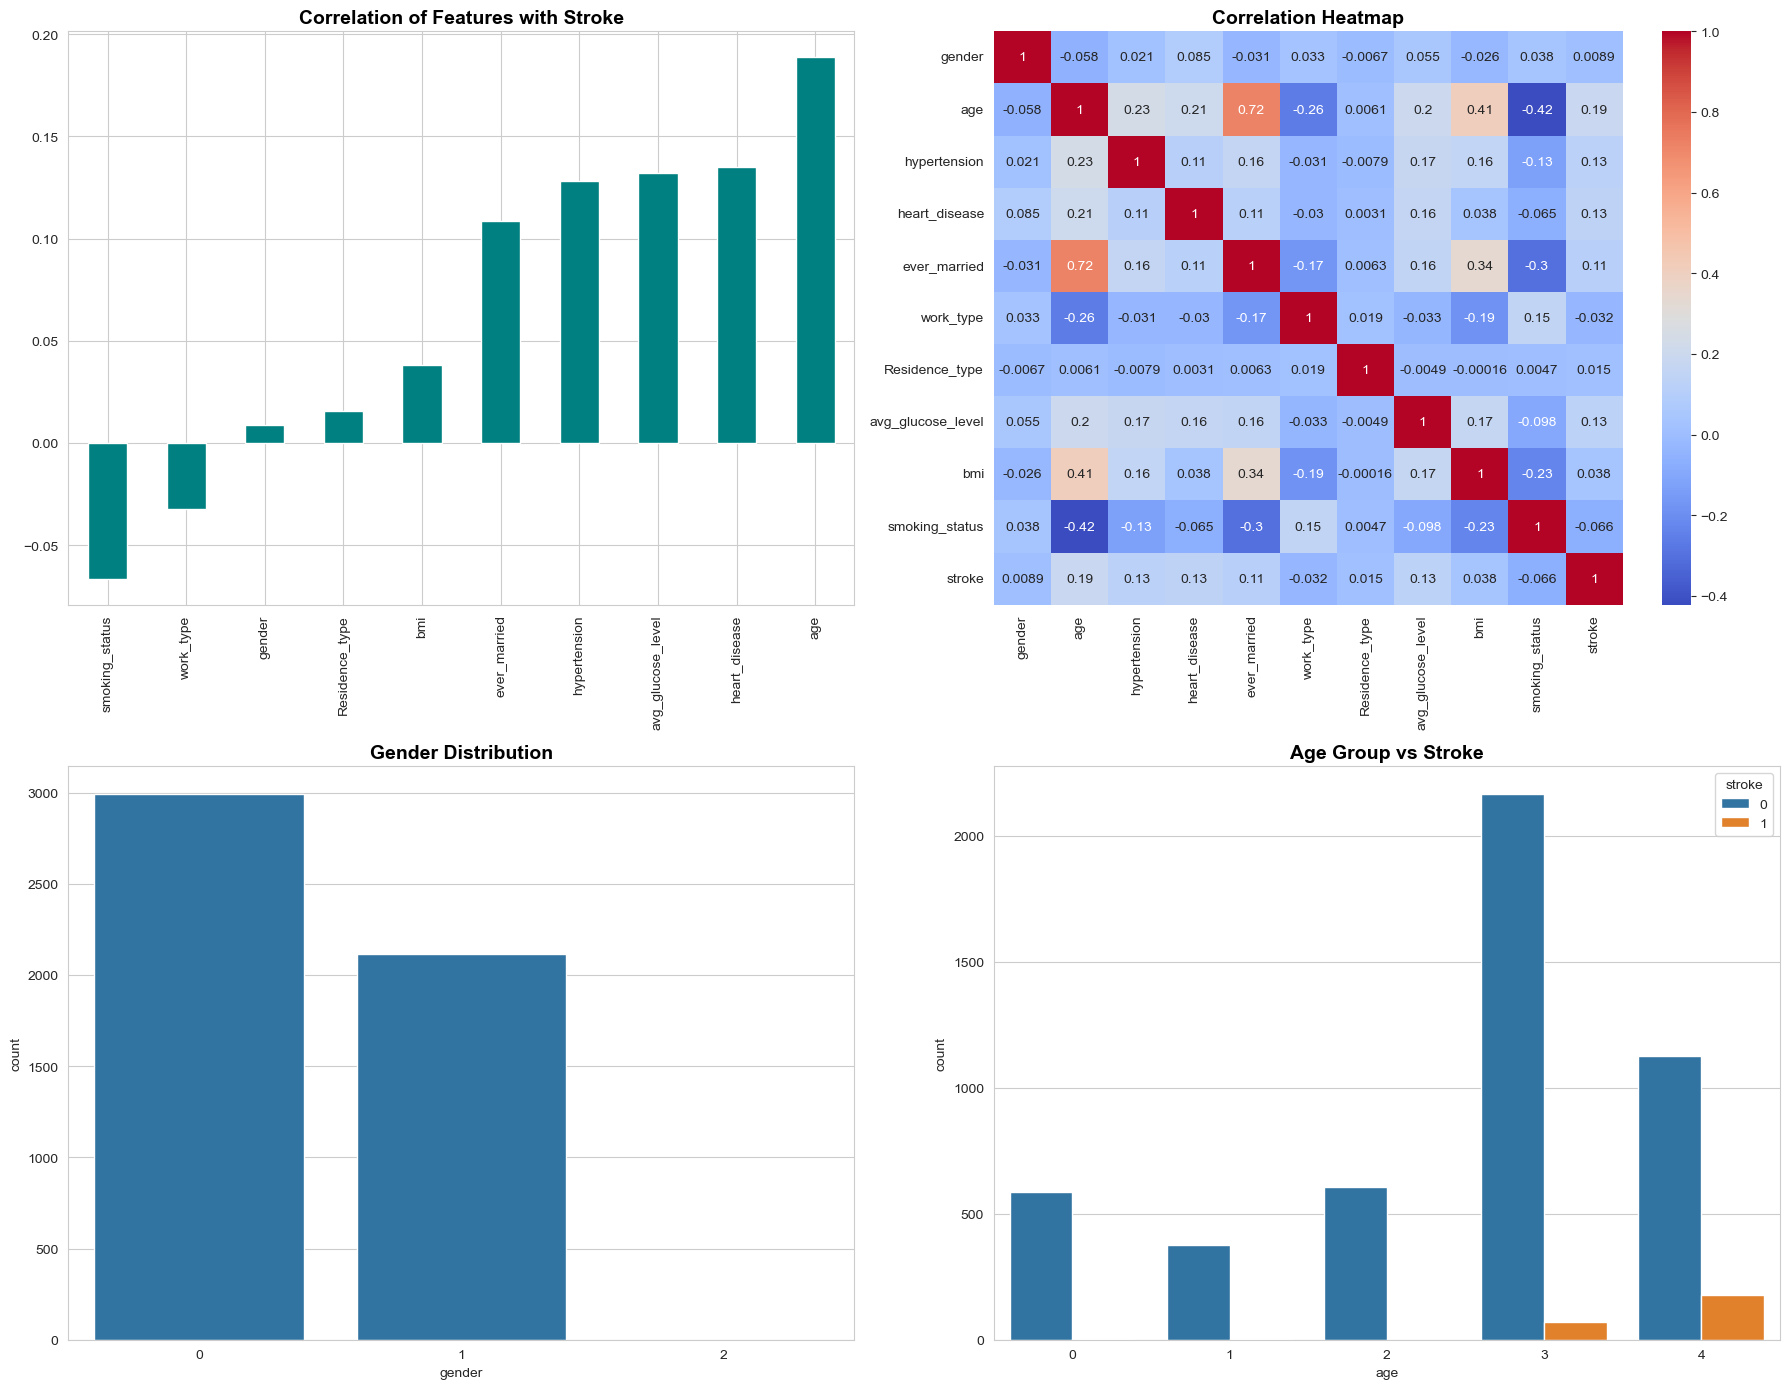

In [13]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(2, 2, figsize=(18, 14))

# Stroke correlation bar chart
df.corr()['stroke'][:-1].sort_values().plot(
    kind='bar',
    ax=ax[0,0],
    color='teal'
)
ax[0,0].set_title("Correlation of Features with Stroke",
                  fontsize=14, fontweight='bold', color='black')

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', ax=ax[0,1])
ax[0,1].set_title("Correlation Heatmap",
                  fontsize=14, fontweight='bold', color='black')

# Gender count
sns.countplot(x='gender', data=df, ax=ax[1,0])
ax[1,0].set_title("Gender Distribution",
                  fontsize=14, fontweight='bold', color='black')

# Age group vs Stroke
sns.countplot(x='age', hue='stroke', data=df, ax=ax[1,1])
ax[1,1].set_title("Age Group vs Stroke",
                  fontsize=14, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


<Axes: xlabel='Residence_type', ylabel='count'>

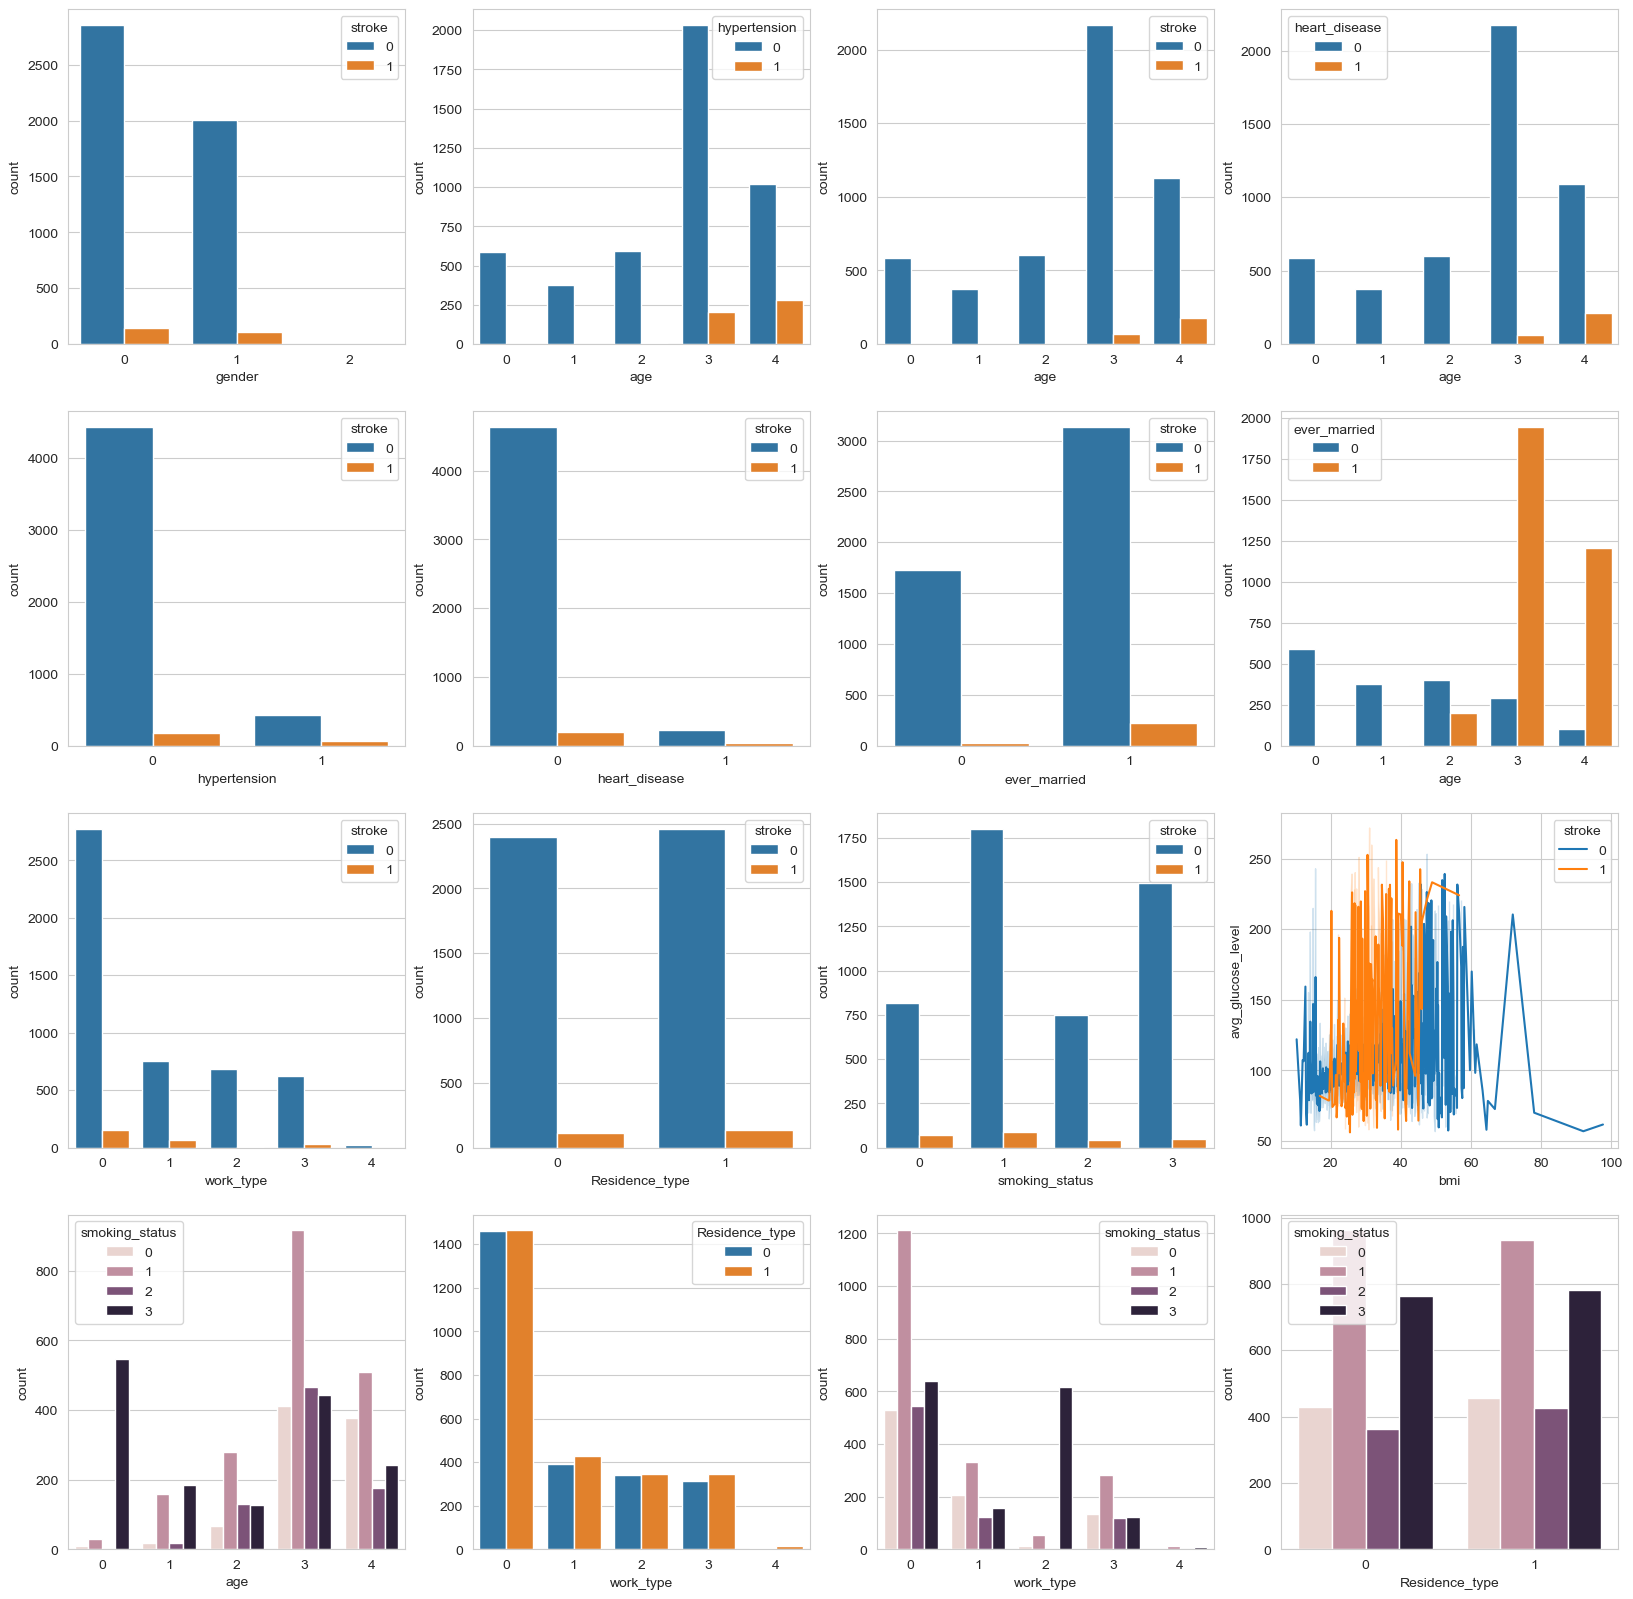

In [ ]:
fig ,ax= plt.subplots(4,4,figsize=(20,20))
sns.countplot(x=df['gender'],hue=df['stroke'],ax=ax[0,0])
sns.countplot(x=df['age'],hue=df['hypertension'],ax=ax[0,1])
sns.countplot(x=df['age'],hue=df['stroke'],ax=ax[0,2])
sns.countplot(x=df['age'],hue=df['heart_disease'],ax=ax[0,3])
sns.countplot(x=df['hypertension'],hue=df['stroke'],ax=ax[1,0])
sns.countplot(x=df['heart_disease'],hue=df['stroke'],ax=ax[1,1])
sns.countplot(x=df['ever_married'],hue=df['stroke'],ax=ax[1,2])
sns.countplot(x=df['age'],hue=df['ever_married'],ax=ax[1,3])
sns.countplot(x=df['work_type'],hue=df['stroke'],ax=ax[2,0])
sns.countplot(x=df['Residence_type'],hue=df['stroke'],ax=ax[2,1])
sns.countplot(x=df['smoking_status'],hue=df['stroke'],ax=ax[2,2])
sns.lineplot(x=df['bmi'],y=df['avg_glucose_level'],hue=df['stroke'],ax=ax[2,3])
sns.countplot(x = df['age'],hue = df['smoking_status'], ax=ax[3,0])
sns.countplot(x = df['work_type'],hue = df['Residence_type'], ax=ax[3,1])
sns.countplot(x = df['work_type'],hue = df['smoking_status'], ax=ax[3,2])
sns.countplot(x = df['Residence_type'],hue = df['smoking_status'], ax=ax[3,3])



# MACHINE LEARNING APPROACH 

# Feature & Target

In [15]:
X = df.drop('stroke', axis=1)
y = df['stroke']

# Train–Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Handle Imbalance

In [17]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Train MODEL
RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=400,
    max_depth=10,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=10, n_estimators=400, random_state=42)

# Probability-based Prediction

In [19]:
rf_probs = rf.predict_proba(X_test)[:, 1]

# medical-safe threshold
rf_pred = (rf_probs >= 0.30).astype(int)


# Model Evaluation

In [20]:
from sklearn.metrics import (
    accuracy_score, f1_score, recall_score,
    confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error
)

accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)

mae = mean_absolute_error(y_test, rf_pred)
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)

print("Accuracy:", accuracy, "→", accuracy*100, "%")
print("F1 Score:", f1)
print("Recall:", recall)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

print("\nClassification Report:\n")
print(classification_report(y_test, rf_pred))


Accuracy: 0.7651663405088063 → 76.51663405088063 %
F1 Score: 0.21568627450980393
Recall: 0.66
MAE: 0.23483365949119372
MSE: 0.23483365949119372
RMSE: 0.4845963882358119

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.77      0.86       972
           1       0.13      0.66      0.22        50

    accuracy                           0.77      1022
   macro avg       0.55      0.72      0.54      1022
weighted avg       0.94      0.77      0.83      1022



# Confusion Matrix

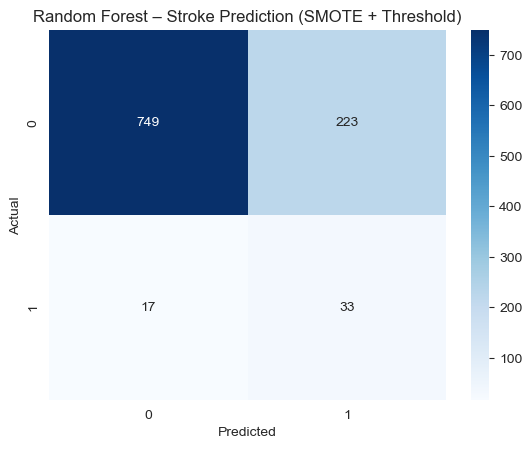

In [21]:
sns.heatmap(
    confusion_matrix(y_test, rf_pred),
    annot=True, fmt='d', cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest – Stroke Prediction (SMOTE + Threshold)")
plt.show()


# Model Save

In [ ]:
import joblib

joblib.dump(rf, "stroke_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

print("ML model saved")


Correct ML model saved


# Project Summary

## 📌 Project Overview
This project focuses on building a **machine learning–based Heart Stroke Prediction System** using patient health data.  
The objective is to predict whether a person is at risk of stroke based on multiple medical and lifestyle features such as age, hypertension, heart disease, glucose level, BMI, smoking status, etc.

Stroke is a **multifactorial medical condition**, so the model was trained using **all relevant features** rather than relying on a single variable.

---

## 📊 Dataset Description
The dataset used in this project is **`healthcare-dataset-stroke-data.csv`**, which contains patient records with the following characteristics:
- Demographic details (age, gender, residence type)
- Medical history (hypertension, heart disease)
- Lifestyle factors (smoking status, work type)
- Clinical measurements (BMI, average glucose level)
- Target variable: **`stroke`** (0 = No Stroke, 1 = Stroke)

The dataset is **highly imbalanced**, with stroke cases being significantly fewer than non-stroke cases.

---

## 🧹 Data Preprocessing
The following preprocessing steps were applied:
- Removal of unnecessary columns (e.g., `id`)
- Handling missing values (BMI filled using mode)
- Encoding categorical variables into numerical form
- Age converted into meaningful age groups
- Exploratory Data Analysis (EDA) using plots and correlation analysis

These steps ensured the data was clean and suitable for machine learning.

---

## 🤖 Model Selection and Training
Several models were explored initially; however, **Random Forest Classifier** was selected due to its:
- Ability to handle non-linear relationships
- Robust performance on medical datasets
- Capability to manage feature interactions effectively

To address the class imbalance:
- **SMOTE (Synthetic Minority Oversampling Technique)** was applied on the training data.
- **Class weight balancing** was used.
- A **custom probability threshold (0.30)** was applied instead of the default 0.50 to reduce false negatives.

---

## 📈 Model Evaluation
The model was evaluated using multiple metrics:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

Special emphasis was given to **Recall**, as missing a stroke patient (false negative) is more dangerous than generating a false alarm.

The confusion matrix analysis showed:
- A significant reduction in false negatives
- Improved stroke detection capability
- Acceptable trade-off between accuracy and recall

---

## 🧪 Threshold-Based Decision Making
Instead of directly using model predictions, probability-based decisions were made:
- If predicted probability ≥ 0.30 → **High Stroke Risk**
- If predicted probability < 0.30 → **Low Stroke Risk**

This approach makes the system more suitable for **medical decision support**, where patient safety is the priority.

---

## 🖥️ GUI Implementation
A **Streamlit-based web application** was developed to make the system user-friendly.  
The GUI allows users to:
- Enter patient details manually
- View stroke risk prediction in percentage form
- Get clear Low/High risk indication

The interface ensures no pre-filled values and enforces proper user input validation.

---

## ✅ Conclusion
This project successfully demonstrates how machine learning can be used to assist in early stroke risk prediction.  
By using proper preprocessing, imbalance handling, threshold tuning, and evaluation metrics, the model provides **clinically meaningful and explainable results**.

Rather than blindly maximizing accuracy, the system prioritizes **patient safety by minimizing false negatives**, making it suitable for real-world healthcare support scenarios.

---

## 🔮 Future Scope
- Adding explainability (feature importance for each prediction)
- Deploying the application on cloud platforms
- Integrating real-time hospital data
- Enhancing the system with ensemble or deep learning models
